In [85]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer

In [86]:
def read_data(month: str):
    filename = "data/fhv_tripdata_2021-{}.parquet".format(month)
    df = pd.read_parquet(filename)
    return df


In [87]:
df = read_data("01")
print("There are {} entries for january".format(len(jan_data)))

There are 1154112 entries for january


In [88]:
df['duration'] = (df["dropOff_datetime"] - df["pickup_datetime"]).apply(lambda x: x.total_seconds()/60)

In [89]:
df['duration'].mean()

19.1672240937939

/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

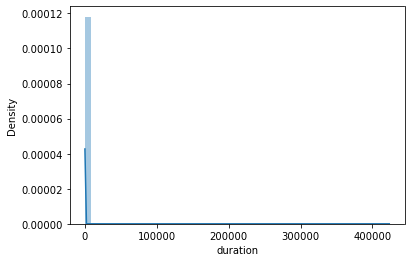

In [90]:
sns.distplot(df['duration'])

In [91]:
df['duration'].describe()

count    1.154112e+06
mean     1.916722e+01
std      3.986922e+02
min      1.666667e-02
25%      7.766667e+00
50%      1.340000e+01
75%      2.228333e+01
max      4.233710e+05
Name: duration, dtype: float64

In [92]:
len(df) - len(df[(df['duration']<=60) & (df['duration']>=1)])

44286

In [93]:
df = df[(df['duration']<=60) & (df['duration']>=1)]

In [94]:
df['PUlocationID'] = df['PUlocationID'].fillna(-1)
df['DOlocationID'] = df['DOlocationID'].fillna(-1)

print("PU NAN: ", df['PUlocationID'].value_counts(normalize=True)[-1])
print("DO NAN: ",df['DOlocationID'].value_counts(normalize=True)[-1])




PU NAN:  0.8352732770722617
DO NAN:  0.13327044059158824


In [95]:
df['PUlocationID'] = df['PUlocationID'].astype(str)
df['DOlocationID'] = df['DOlocationID'].astype(str)

dic_vec = DictVectorizer()



In [96]:
X_train = dic_vec.fit_transform(df[['PUlocationID', 'DOlocationID']].to_dict(orient = "records"))
X_train


<1109826x525 sparse matrix of type '<class 'numpy.float64'>'
	with 2219652 stored elements in Compressed Sparse Row format>

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

y_train = df['duration']



lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [98]:
y_pred = lr.predict(X_train)
rmse_train = mean_squared_error(y_train, y_pred, squared = False)
rmse_train

10.528519107206316

In [99]:


def read_and_clean(month: str):
    filename = "data/fhv_tripdata_2021-{}.parquet".format(month)
    df = pd.read_parquet(filename)
    df['duration'] = (df["dropOff_datetime"] - df["pickup_datetime"]).apply(lambda x: x.total_seconds()/60)
    
    df['PUlocationID'] = df['PUlocationID'].fillna(-1)
    df['DOlocationID'] = df['DOlocationID'].fillna(-1)
    
    df['PUlocationID'] = df['PUlocationID'].astype(str)
    df['DOlocationID'] = df['DOlocationID'].astype(str)
    
    df = df[(df['duration']<=60) & (df['duration']>=1)]
    
    return df
    
df_val = read_and_clean("02")

X_val = dic_vec.transform(df_val[['PUlocationID', 'DOlocationID']].to_dict(orient='records'))
y_val = df_val['duration']

y_pred_val = lr.predict(X_val)

rmse_val = mean_squared_error(y_val, y_pred_val, squared = False)
rmse_val

11.014283149347039